### Basic Random Forest baseline before trying more advanced models 

In [1]:
import pandas as pd
import numpy as np

In [ ]:
merged = pd.read_csv ("merged.csv")

In [4]:
pd.set_option('display.max_columns', None)
merged.head ()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1


In [6]:
merged.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [169]:
def process (df):
    # clearning, shifting the target, and one-hot encode the position
    df ['target'] = df.groupby('name')['total_points'].shift(-1)
    df = df.drop (['season_x', 'name', 'team_x', 'kickoff_time', 'opponent_team', 'round', 'element', 'fixture', 'bonus'], axis=1)
    df ['was_home'] = np.multiply (df ['was_home'], 1)
    df['GK'] = df['position'].apply(lambda x: 1 if x == 'GK' else 0)
    df['DEF'] = df['position'].apply(lambda x: 1 if x == 'DEF' else 0)
    df['MID'] = df['position'].apply(lambda x: 1 if x == 'MID' else 0)
    df['FWD'] = df['position'].apply(lambda x: 1 if x == 'FWD' else 0)
    df = df.drop (['position'], axis=1)
    return df

In [42]:
temp = process (merged)
temp.tail ()

,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,target,GK,DEF,MID,FWD
100744,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8368,2.0,0.0,0.0,-1173,107,1280,45,0,0,NaN,0,0,1,0
100745,0,0,1,0,0.6,0,0,0.6,3.0,16,0,0,0,0,0,173321,2.0,0.0,2.0,-46700,8651,55351,45,0,0,NaN,0,1,0,0
100746,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,12452,1.0,0.0,0.0,-1396,617,2013,45,1,0,NaN,0,1,0,0
100747,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7760,0.0,1.0,0.0,-1664,252,1916,45,1,0,NaN,0,0,1,0
100748,0,0,4,0,1.0,4,0,0.8,6.8,45,0,0,0,0,0,10099,0.0,9.0,0.0,-1954,232,2186,54,0,0,NaN,0,0,1,0


In [168]:
def add_features ():
 # Feature construction happens here
 return

* Use RF as a benchmark; pick the best team possible for the final gameweek of 21-22
* Compare results with and without tuning for hyper-parameters

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

szn_22 = merged [merged ['season_x'] == "2021-22"]
processed_22 = process (szn_22)
processed_22 = processed_22 [processed_22 ['GW']!=38].drop (['GW'], axis = 1)
X, y = processed_22.drop (['target'], axis=1), processed_22 ['target']
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, y)

C:\Users\Bryant Xia\AppData\Local\Temp\ipykernel_28008\296024773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['target'] = df.groupby('name')['total_points'].shift(-1)


RandomForestRegressor(max_depth=20, random_state=0)

In [167]:
regr.get_params ()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

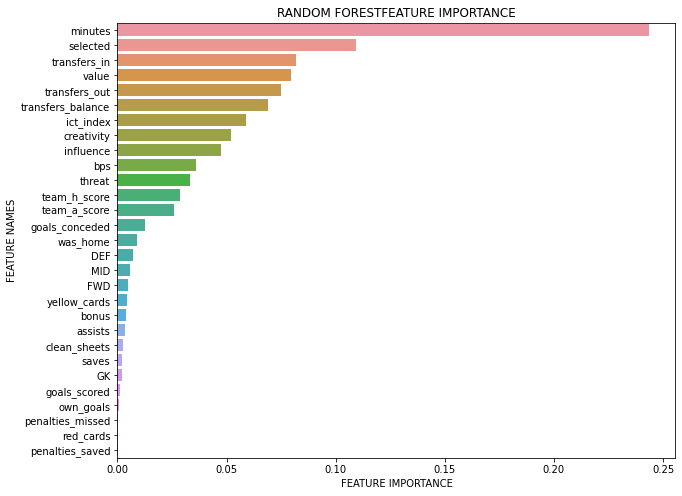

In [164]:
# plotting feature importance; copied from: https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(regr.feature_importances_, X.columns,'RANDOM FOREST')

In [74]:
last_wk_22 = merged [merged ['season_x'] == "2021-22"]
last_wk_22 = last_wk_22 [last_wk_22 ['GW'] == 38]
last_wk_22 = process (last_wk_22)
last_wk_22 = last_wk_22.drop (['target', 'GW'], axis=1)
preds = regr.predict (last_wk_22)
temp = merged [merged ['season_x'] == "2021-22"]
temp = temp [temp ['GW'] == 38]
temp ['pred'] = preds
temp = temp.sort_values (by='pred', ascending = False).reset_index ()

In [77]:
temp.head (10)

,index,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,target,pred
0,97857,2021-22,Mohamed Salah,MID,Liverpool,0,0,22,0,0.0,233,378,0,1,0.0,0.0,2022-05-22T15:00:00Z,32,20,0,0,0,0,38,0,3664020,1.0,3.0,0.0,6,-778411,10087,788498,131,True,0,38,12.0,5.740000
1,98272,2021-22,Harry Kane,FWD,Spurs,1,1,42,1,0.0,357,380,0,1,0.0,0.0,2022-05-22T15:00:00Z,90,15,0,0,0,0,38,0,2196579,5.0,0.0,0.0,10,227108,266861,39753,125,False,0,38,2.0,5.560000
2,98254,2021-22,Heung-Min Son,MID,Spurs,0,0,27,1,0.0,359,380,0,2,0.0,0.0,2022-05-22T15:00:00Z,90,15,0,0,0,0,38,0,3326112,5.0,0.0,0.0,12,383923,414358,30435,112,False,1,38,NaN,5.354154
3,98252,2021-22,Gabriel Teodoro Martinelli Silva,MID,Arsenal,1,2,38,0,0.0,26,371,1,1,0.0,0.0,2022-05-22T15:00:00Z,90,8,0,0,0,0,38,0,285487,1.0,5.0,0.0,12,-6904,13260,20164,53,True,0,38,NaN,5.146592
4,97856,2021-22,Kevin De Bruyne,MID,Man City,1,1,27,0,0.0,251,379,2,0,0.0,0.0,2022-05-22T15:00:00Z,90,2,0,0,0,0,38,0,1755119,2.0,3.0,0.0,6,288147,338696,50549,121,True,0,38,6.0,4.815833
5,98230,2021-22,Illan Meslier,GK,Leeds,0,1,18,0,0.0,199,372,1,0,0.0,0.0,2022-05-22T15:00:00Z,90,3,0,0,0,0,38,4,186264,2.0,1.0,0.0,4,1980,5560,3580,48,False,0,38,3.0,4.740047
6,98172,2021-22,Vicente Guaita,GK,Crystal Palace,0,3,28,1,0.0,146,376,0,0,0.0,0.0,2022-05-22T15:00:00Z,90,13,0,0,0,0,38,4,505318,0.0,1.0,0.0,10,-15113,1827,16940,46,True,0,38,1.0,4.689648
7,97915,2021-22,Bruno Guimarães Rodriguez Moura,MID,Newcastle,0,0,10,0,0.0,697,374,1,0,0.0,0.0,2022-05-22T15:00:00Z,90,5,0,0,0,0,38,0,277262,2.0,1.0,0.0,2,83386,90695,7309,50,False,0,38,3.0,4.680881
8,97936,2021-22,Demarai Gray,MID,Everton,0,0,3,0,0.0,484,371,5,0,0.0,0.0,2022-05-22T15:00:00Z,90,1,0,0,0,0,38,0,471491,1.0,5.0,0.0,2,-18947,4285,23232,54,False,0,38,2.0,4.613770
9,98304,2021-22,Tomas Soucek,MID,West Ham,0,0,2,0,0.0,422,373,3,0,0.0,0.0,2022-05-22T15:00:00Z,90,4,0,0,0,0,38,0,313355,1.0,3.0,0.0,1,204,3309,3105,57,False,1,38,2.0,4.565891


#### Assembling a team
* Pick out the 10 best forwards, midfielders, and defenders + lock in the best GK
* Pick out the squad with the highest points predicted combined while satisfying FPL rules

In [161]:
import copy

combos = []

def n_choose_c (n, c, cur, idx, length):
    copy_cur = copy.deepcopy (cur)
    if (length==c):
        combos.append (copy_cur)
    elif (length>c):
        return
    else:
        temp = copy.deepcopy (copy_cur)
        for j in range (idx, n):
            if (temp==[]):
                temp = [j]
            else:
                temp.append (j)
            n_choose_c (n, c, temp, j+1, len(temp)) 
            temp.pop ()

start = []

n_choose_c (10, 3, start, 0, 0)
combos3 = copy.deepcopy (combos)
combos = []
n_choose_c (10, 4, start, 0, 0)
combos4 = copy.deepcopy (combos)

In [162]:
# legal if:
# 1) under budget 2) no more than three players are from the same team

def legal (attackers, midfielders, defenders, att_index, mid_index, def_index, budget):
    team_count = dict ()
    total_val = 0
    point_total = 0
    names = []
    for idx in att_index:
        team = attackers['team_x'][idx]
        name = attackers['name'][idx]
        cost = attackers['value'][idx]
        point_total += attackers['pred'][idx]
        names.append (name)
        total_val += cost
        if (team in team_count):
            team_count [team] +=1
        else:
            team_count [team] = 1
    for idx in mid_index:
        team = midfielders['team_x'][idx]
        name = midfielders['name'][idx]
        cost = midfielders['value'][idx]
        point_total += midfielders['pred'][idx]
        names.append (name)
        total_val += cost
        if (team in team_count):
            team_count [team] +=1
        else:
            team_count [team] = 1
    for idx in def_index:
        team = defenders['team_x'][idx]
        name = defenders['name'][idx]
        cost = defenders['value'][idx]
        point_total += defenders['pred'][idx]
        names.append (name)
        total_val += cost
        if (team in team_count):
            team_count [team] +=1
        else:
            team_count [team] = 1
    if (total_val>budget):
        return False, names
    else:
        max_players = sorted (list(team_count.values()))[-1]
        if (max_players>3): return False, names
    return point_total, names

def portfolio (df):
    max = -1000
    best_group = []
    # with df (names + preds + other info) -> return the best possible team
    forwards = df [df ['position'] == "FWD"].reset_index ()[:10]
    midfileders = df [df ['position'] == "MID"].reset_index ()[:10]
    defenders = df [df ['position'] == "DEF"][:10].reset_index ()[:10]  
    keepers = df [df ['position'] == "GK"][:10].reset_index ()[:10]
    cap = 1000
    cap -= keepers ['value'][0]
    count = 1
    for att_index in combos3:
        for mid_index in combos3:
            for def_index in combos4: 
                if (count%10000 == 0):
                    print (count, end = " ") 
                count += 1
                valid, names = legal (forwards, midfileders, defenders, att_index, mid_index, def_index, cap)
                if (valid != False):
                    if (valid>max):
                        max = valid
                        best_group = names
    return max, best_group
    


In [153]:
portfolio (temp)

10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 260000 270000 280000 290000 300000 310000 320000 330000 340000 350000 360000 370000 380000 390000 400000 410000 420000 430000 440000 450000 460000 470000 480000 490000 500000 510000 520000 530000 540000 550000 560000 570000 580000 590000 600000 610000 620000 630000 640000 650000 660000 670000 680000 690000 700000 710000 720000 730000 740000 750000 760000 770000 780000 790000 800000 810000 820000 830000 840000 850000 860000 870000 880000 890000 900000 910000 920000 930000 940000 950000 960000 970000 980000 990000 1000000 1010000 1020000 1030000 1040000 1050000 1060000 1070000 1080000 1090000 1100000 1110000 1120000 1130000 1140000 1150000 1160000 1170000 1180000 1190000 1200000 1210000 1220000 1230000 1240000 1250000 1260000 1270000 1280000 1290000 1300000 1310000 1320000 1330000 1340000 1350000 1360000 1370000 1380000 1390

(47.58422812117867,
 ['Harry Kane',
  'Edward Nketiah',
  'Danny Welbeck',
  'Mohamed Salah',
  'Heung-Min Son',
  'Gabriel Teodoro Martinelli Silva',
  'João Pedro Cavaco Cancelo',
  'Harry Maguire',
  'Pontus Jansson',
  'Joel Matip'])

In [155]:
squad = ['Illan Meslier',
  'Harry Kane',
  'Edward Nketiah',
  'Danny Welbeck',
  'Mohamed Salah',
  'Heung-Min Son',
  'Gabriel Teodoro Martinelli Silva',
  'João Pedro Cavaco Cancelo',
  'Harry Maguire',
  'Pontus Jansson',
  'Joel Matip']

In [159]:
def actual_pts (squad, df):
    total = 0
    max_exp = -1
    triple_cap = 0
    for player in squad:
        temp = df [df['name'] == player].reset_index ()
        total += temp ['total_points'][0]
        if (temp ['pred'][0]>max_exp): # triple cap the player with the maximum expected points
            max_exp = temp ['pred'][0]
            triple_cap = temp ['total_points'][0]*2
    return total+triple_cap


In [160]:
actual_pts (squad, temp)

84

* Without tuning, and with triple-captaining the player with the highest points predicted: the squad selected will earn 84 points in GW 38

^ The above again, but tune the parameters this time